Analyzing amazon data science books dataset

- Author: Pawan Kumar Shrestha
  
- Date: 26 December 2022

Dataset:

This project uses the Data Science books dataset available on Kaggle https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books

To-do List:

1. EDA: Do more expensive books have better review?
   
2. EDA: Do longer book pages have higher pages?

3. What are the best Python and Machine Learning books?

4. Cluster analysis of book names using TF-IDF and K-means


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('dataset/amazon-ds-book.csv')
df

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,The Book of R: A First Course in Programming a...,[Tilman M. Davies],28.33,832.0,4.6,327,0.74,0.16,0.06,0.02,0.03,7 x 1.44 x 9.25 inches,2.95 pounds,English,No Starch Press; 1st edition (July 16 2016),978-1593276515,/Book-First-Course-Programming-Statistics/dp/1...,https://www.amazon.com/Book-First-Course-Progr...
942,Basic Business Statistics: A Casebook (Textboo...,"[Dean P. Foster,Robert A. Stine et al.]",59.23,260.0,4.3,6,0.70,0.11,0.19,0.00,0.00,8.27 x 0.6 x 11.02 inches,2.93 pounds,English,Springer; 1st ed. 1998. 4th printing 2001 edit...,978-0387983547,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
943,Elementary Statistics: Picturing the World,"[Ron Larson,Betsy Farber]",129.99,704.0,4.5,1025,0.72,0.14,0.07,0.01,0.05,8.5 x 1.1 x 11 inches,3.48 pounds,English,Pearson; 7th edition (January 3 2018),978-0134683416,/Elementary-Statistics-Picturing-World-7th/dp/...,https://www.amazon.com/Elementary-Statistics-P...
944,Making Sense of Statistics: A Conceptual Overview,"[Fred Pyrczak,Deborah M. Oh]",47.76,252.0,4.6,145,0.78,0.13,0.04,0.02,0.04,8.5 x 0.57 x 11 inches,1.12 pounds,English,Routledge; 7th edition (June 18 2018),978-1138894761,/Making-Sense-Statistics-Fred-Pyrczak/dp/11388...,https://www.amazon.com/Making-Sense-Statistics...


In [3]:
df.head()

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...


Exploratory Data Analysis

Price vs avg_reviews

In [4]:
px.scatter(df, x='price', y='avg_reviews', size='n_reviews')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'price=%{x}<br>avg_reviews=%{y}<br>n_reviews=%{marker.size}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa',
                         'size': array([ 184,  599,   33, ..., 1025,  145,  787], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 18.9075,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 24.49,  26.  ,  50.76, ..., 129.99,  47.76,  15.55]),
              'xaxis': 'x',
              'y': array([4.6, 4.5, 5. , ..., 4.5, 4.6, 4.5]),
              'yaxis': 'y'}],
    'layout': {'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'price'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'avg_reviews'}}}
})

Analyzing price with average reviews comes positively. The higher price - has good reviews

Viewing same data in bar plot

In [ ]:
px.scatter(df, x='avg_reviews', y='price')

Best Python Books

In [ ]:
# select books based on title containing 'Python'
python_books = df[df['title'].str.contains('Python')]

# Python books with most reviews and highest average rating
best_python_books = python_books.nlargest(7, ['n_reviews', 'avg_reviews'])
best_python_books

Best Machine Learning Book

In [ ]:
# select books based on title containing 'Machine Learning'
ml_books = df[df['title'].str.contains('Machine Learning')]

# ML books with most reviews and highest average rating
best_ml_books = ml_books.nlargest(7, ['n_reviews', 'avg_reviews'])
best_ml_books

Clustering book titles

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df['title'])

In [ ]:
# text vectorization
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
from sklearn.cluster import KMeans

sum_of_squared_distance = []

# Kmeans clustering
K = range(2, 10)
for row in K:
    km = KMeans(n_clusters=row, max_iter=600, n_init=10)
    km.fit(X)
    sum_of_squared_distance.append(km.inertia_)

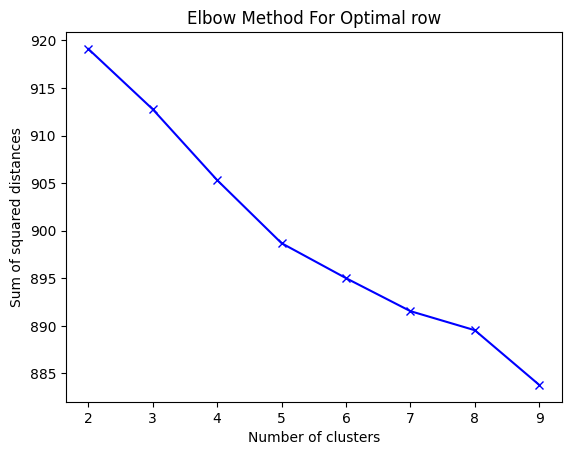

In [ ]:
plt.plot(K, sum_of_squared_distance, 'bx-') # plot has three arguments marker, line and color. bx means blue i.e. color marker
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal row')
plt.show()

In [ ]:
# get clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df['title'],labels)), columns=['title', 'cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
472  Deep Discourse: A Framework for Cultivating St...        0
736  Web Scraping with Python: Collecting More Data...        0
738            Python Workout: 50 ten-minute exercises        0
739  Real-World Python: A Hackers Guide to Solving ...        0
740  Full-Color Illustration Data Structrues & Algo...        0
..                                                 ...      ...
308  Statistical Rethinking: A Bayesian Course with...        5
205  Supervised Machine Learning for Text Analysis ...        5
115  Data Science (Chapman & Hall/CRC Data Science ...        5
39   Bayesian Ideas and Data Analysis: An Introduct...        5
318  Hierarchical Modeling and Analysis for Spatial...        5

[946 rows x 2 columns]


In [ ]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 145.1 kB/s eta 0:00:00


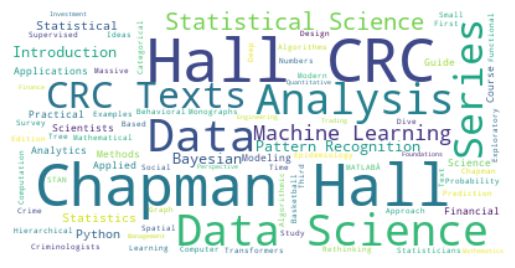

In [ ]:
# create word clouds for clustering
from wordcloud import WordCloud

for row in range(true_k):
    text = book_cl[book_cl.cluster == row]['title'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)

plt.show()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

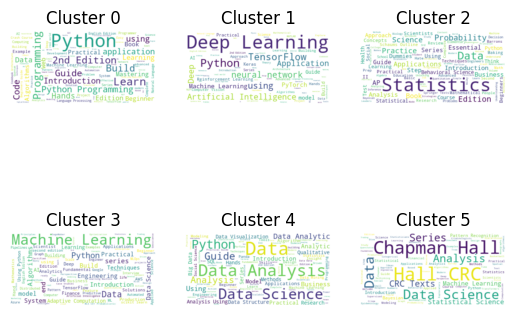

In [ ]:
# create word clouds for clustering
from wordcloud import WordCloud

for row in range(true_k):
    text = book_cl[book_cl.cluster == row]['title'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)

    # create subplot
    plt.subplot(2, 3, row+1).set_title('Cluster ' + str(row))
    plt.plot()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
plt.show()

In [ ]:
# books in clusters
book_cl[book_cl.cluster==1]

,title,cluster
155,The TensorFlow Workshop: A hands-on guide to b...,1
389,The Science of Deep Learning,1
390,Inside Deep Learning: Math Algorithms Models,1
391,Mathematical Aspects of Deep Learning,1
392,Deep Learning for Coders with Fastai and PyTor...,1
...,...,...
554,Deep Reinforcement Learning with Python: Maste...,1
556,Essentials of Deep Learning and AI: Experience...,1
557,Hands-On Deep Learning with Apache Spark: Buil...,1
558,Deep Learning from the Basics: Python and Deep...,1


In [ ]:
# predict the unseen data

test = vectorizer.transform(['machine learning'])
model.predict(test)[0]

3

if we give book title as machine learning, model will classify it as cluster 3